In [1]:
import sys
sys.path.append('/home/kyungtak.lim/gbspy')
#from skimage.measure import label, regionprops

In [17]:
import gbspy as g
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

import os
import h5py
from gbspy import drifts

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 20px;"><b> Data load</b></span><br>
</div>

In [8]:
# Get the current working directory|
cwd = os.getcwd()

os.chdir('/zhisongqu_data/kyungtak/data_GBS/GBS_SN/nu_scan/SN_nu0p01')
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

t2= s.time[-1]
t1= t2

# Entire torus
z1 = s.z[0]
z2 = s.z[-1]
iz = s.find_ind(z2, s.z)
bsign = s.attribute["B0sign"]

Psi = s.Psi; ixxpt = s.ixxpt; iyxpt = s.iyxpt

dens  = s.get_field('n', z1=z1, z2=z2, t1=t1, t2=t2)
dens_avg  = np.mean(dens, axis=(2,3)); 
dens_std  = np.std(dens, axis=(2,3))
dens_avg_tor = np.mean(dens, axis=2)

theta  = s.get_field('theta', z1=z1, z2=z2, t1=t1, t2=t2)
phi  = s.get_field('strmf', z1=z1, z2=z2, t1=t1, t2=t2)
tempe  = s.get_field('temperature', z1=z1, z2=z2, t1=t1, t2=t2) 
#dens_std  = np.std(dens, axis=(2,3))
#dens_avg_tor = np.mean(dens, axis=2)


# Normalized
dens_fluct   = np.sqrt((dens[:,:,0,:]-dens_avg_tor)**2) / dens_avg_tor
#dens_fluct = dens[:,:,0,-1] - dens_avg
dens_fluct_avg = np.mean(dens_fluct, axis=2)


Current working directory: /zhisongqu_data/kyungtak/data_GBS/GBS_SN/nu_scan/SN_nu0p01


In [11]:
#exb_velocity(s, strmf
v_exb_x, v_exb_y = drifts.exb_velocity(s, phi)
v_de_x, v_de_y   = drifts.diamagnetic_e_velocity(s, theta, tempe)

In [13]:
print(v_exb_x.shape)
print(v_exb_y.shape)
print(v_de_x.shape)
print(v_de

(324, 244, 80, 1)
(324, 244, 80, 1)
(324, 244, 80, 1)
(324, 244, 80, 1)


<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 20px;"><b> Plot </b></span><br>
</div>

NameError: name 'contours' is not defined

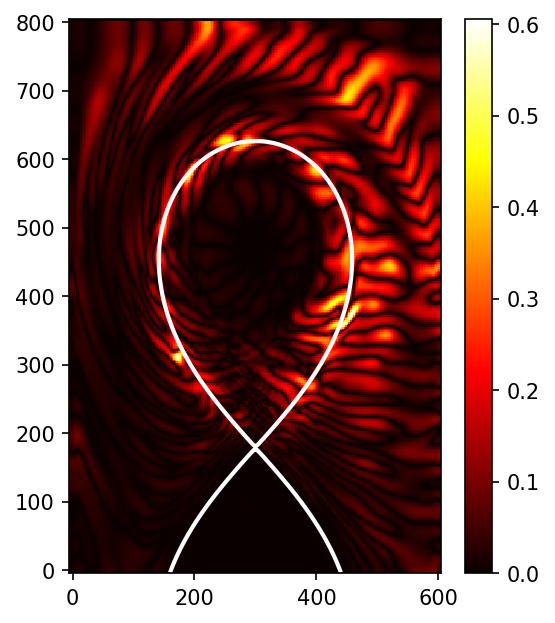

In [15]:
from skimage import measure
from skimage.measure import label, regionprops, find_contours

X,Y = np.meshgrid(s.x, s.y)
    
# Visualize each contour on the original plot
fig, ax = plt.subplots(figsize=(4, 4.8), dpi=150)

    
cs = ax.pcolormesh(X, Y, dens_fluct_avg, cmap='hot')
cbar = fig.colorbar(cs)
#cs5 = ax.pcolormesh(X, Y, right_outside_mask, cmap='binary_r', alpha=0.5)


# Plot the separatrix
ax.contour(X, Y, Psi, levels=[Psi[iyxpt, ixxpt]], colors='w', linewidths=2)

# Set the axes labels
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', direction='in', labelsize=12, width=0.8, size=2, pad=5)
ax.set_xlabel(r'$R\,\,[\rho_{s0}]$', fontsize=12)
ax.set_ylabel(r'$Z\,\,[\rho_{s0}]$', fontsize=12, rotation=90)
ax.set_title(r'$\tilde{n}/\bar{n}$', fontsize=15)
ax.set_xlim([0,600]); ax.set_ylim([0,800])

plt.show()

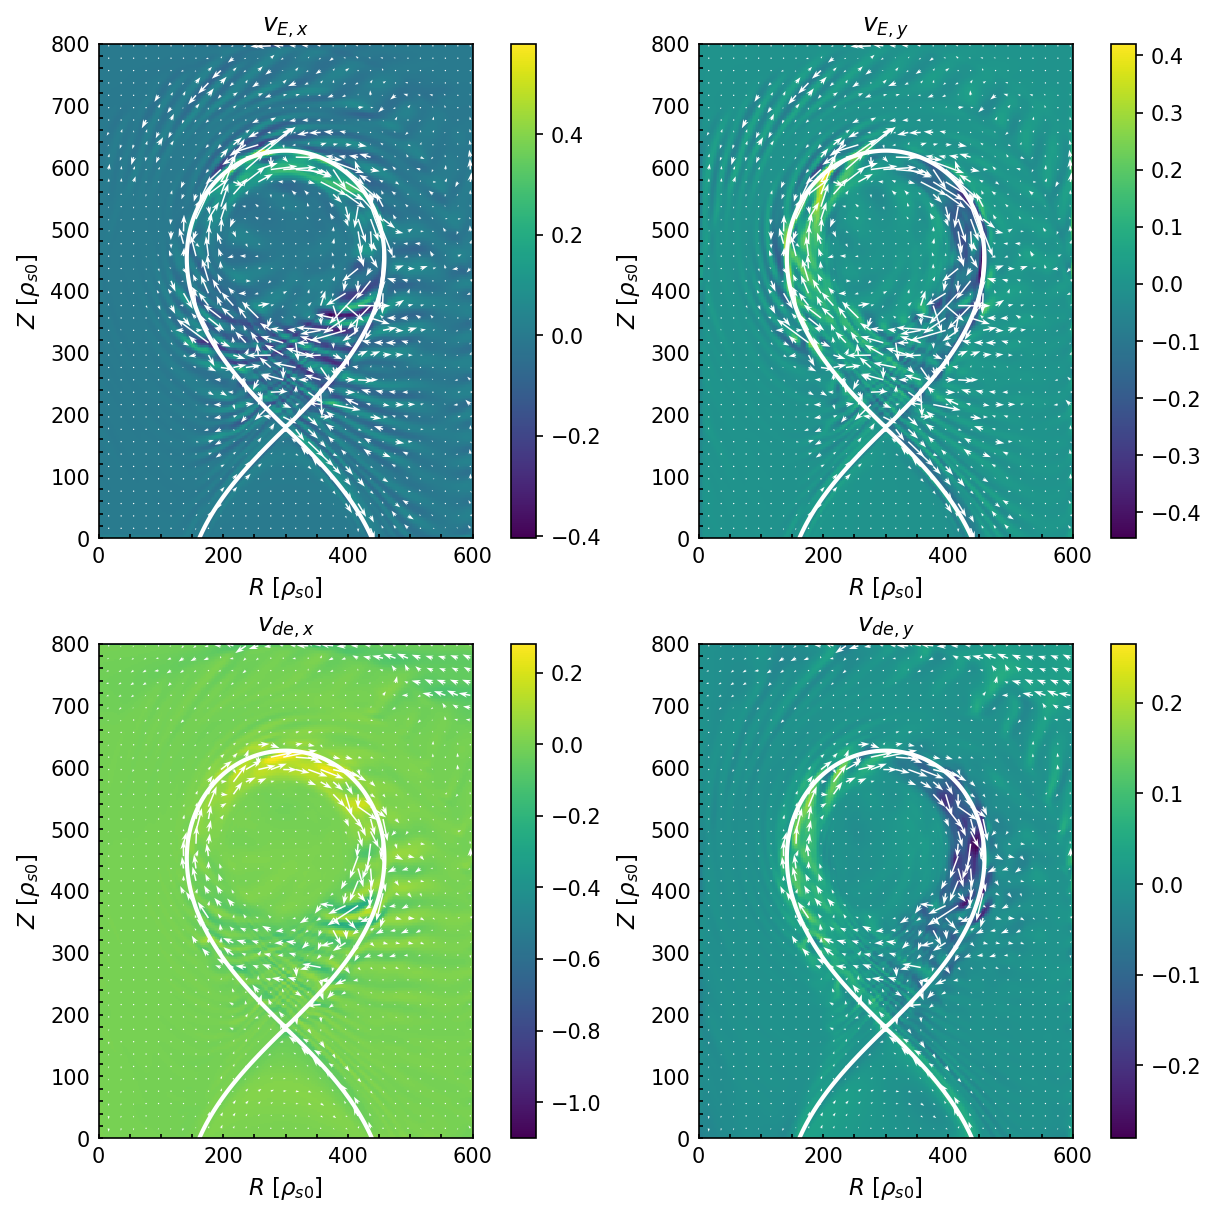

In [33]:
# Choose toroidal index and time index
iphi = 0       # toroidal slice
it   = 0       # time slice

# Extract 2D slices (R,Z) for each drift component
vExb_x_2d = v_exb_x[:, :, iphi, it]
vExb_y_2d = v_exb_y[:, :, iphi, it]
vDe_x_2d  = v_de_x[:,  :, iphi, it]
vDe_y_2d  = v_de_y[:,  :, iphi, it]

X_plot, Y_plot = X, Y

# ---- arrow thinning ----
skip = 8
Xs = X_plot[::skip, ::skip]
Ys = Y_plot[::skip, ::skip]

vExb_x_s = vExb_x_2d[::skip, ::skip]
vExb_y_s = vExb_y_2d[::skip, ::skip]
vDe_x_s  = vDe_x_2d[::skip, ::skip]
vDe_y_s  = vDe_y_2d[::skip, ::skip]

# --------------------------------

fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=150, constrained_layout=True)

def format_ax(ax, title):
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', direction='in', labelsize=10, width=0.8, size=2, pad=4)
    ax.set_xlabel(r'$R\,\,[\rho_{s0}]$', fontsize=11)
    ax.set_ylabel(r'$Z\,\,[\rho_{s0}]$', fontsize=11, rotation=90)
    ax.set_xlim([0, 600])
    ax.set_ylim([0, 800])
    ax.set_title(title, fontsize=12)

# ======================================================
# Helper to add separatrix
def add_separatrix(ax):
    ax.contour(
        X_plot, Y_plot, Psi,
        levels=[Psi[iyxpt, ixxpt]],
        colors='w', linewidths=2
    )

# ======================================================
# 1) v_E,x
im0 = axes[0, 0].pcolormesh(X_plot, Y_plot, vExb_x_2d, cmap='viridis', shading="auto")
add_separatrix(axes[0, 0])
axes[0, 0].quiver(
    Xs, Ys, vExb_x_s, vExb_y_s,
    color='white',
    scale=3,
    width=0.004,
    headwidth=4,
    headlength=6,
)
format_ax(axes[0, 0], r'$v_{E,x}$')
fig.colorbar(im0, ax=axes[0, 0])


# 2) v_E,y
im1 = axes[0, 1].pcolormesh(X_plot, Y_plot, vExb_y_2d, cmap='viridis', shading="auto")
add_separatrix(axes[0, 1])
axes[0, 1].quiver(
    Xs, Ys, vExb_x_s, vExb_y_s,
    color='white',
    scale=3,
    width=0.004,
    headwidth=4,
    headlength=6,
)
format_ax(axes[0, 1], r'$v_{E,y}$')
fig.colorbar(im1, ax=axes[0, 1])


# 3) v_{de,x}
im2 = axes[1, 0].pcolormesh(X_plot, Y_plot, vDe_x_2d, cmap='viridis', shading="auto")
add_separatrix(axes[1, 0])
axes[1, 0].quiver(
    Xs, Ys, vDe_x_s, vDe_y_s,
    color='white',
    scale=3,
    width=0.004,
    headwidth=4,
    headlength=6,
)
format_ax(axes[1, 0], r'$v_{de,x}$')
fig.colorbar(im2, ax=axes[1, 0])


# 4) v_{de,y}
im3 = axes[1, 1].pcolormesh(X_plot, Y_plot, vDe_y_2d, cmap='viridis', shading="auto")
add_separatrix(axes[1, 1])
axes[1, 1].quiver(
    Xs, Ys, vDe_x_s, vDe_y_s,
    color='white',
    scale=3,
    width=0.004,
    headwidth=4,
    headlength=6,
)
format_ax(axes[1, 1], r'$v_{de,y}$')
fig.colorbar(im3, ax=axes[1, 1])


plt.show()
